## Подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
df_contract = pd.read_csv('C:/Users/rakhm/Desktop/Яндекс.Практикум/Выпускной проект/final_provider/contract.csv')

In [ ]:
df_internet = pd.read_csv('C:/Users/rakhm/Desktop/Яндекс.Практикум/Выпускной проект/final_provider/internet.csv')

In [ ]:
df_personal = pd.read_csv('C:/Users/rakhm/Desktop/Яндекс.Практикум/Выпускной проект/final_provider/personal.csv')

In [ ]:
df_phone = pd.read_csv('C:/Users/rakhm/Desktop/Яндекс.Практикум/Выпускной проект/final_provider/phone.csv')

In [ ]:
df_contract = pd.read_csv('/datasets/final_provider/contract.csv')
df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
df_phone = pd.read_csv('/datasets/final_provider/phone.csv')


In [ ]:
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [ ]:
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [ ]:
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [ ]:
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [ ]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [ ]:
df_contract.isna().mean()

customerID          0.0
BeginDate           0.0
EndDate             0.0
Type                0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
dtype: float64

In [ ]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
customerID          5517 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
dtypes: object(8)
memory usage: 344.9+ KB


In [ ]:
df_internet.isna().mean()

customerID          0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
dtype: float64

In [ ]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID       7043 non-null object
gender           7043 non-null object
SeniorCitizen    7043 non-null int64
Partner          7043 non-null object
Dependents       7043 non-null object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [ ]:
df_personal.isna().mean()

customerID       0.0
gender           0.0
SeniorCitizen    0.0
Partner          0.0
Dependents       0.0
dtype: float64

In [ ]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
customerID       6361 non-null object
MultipleLines    6361 non-null object
dtypes: object(2)
memory usage: 99.5+ KB


In [ ]:
df_phone.isna().mean()

customerID       0.0
MultipleLines    0.0
dtype: float64

Выделим целевой признак. Те, у кого в признаке "EndDate" стоит значение No, продолжают пользоваться тарифом.

In [ ]:
def target(row):
    
    live_time = row['EndDate']
    
    if live_time == 'No':
        return 0
    else:
        return 1

df_contract['target'] = df_contract.apply(target, axis=1)

Поменяем тип данных в столбце TotalCharges. После его смены остлись пустые значения - удалим их

In [ ]:
df_contract['TotalCharges'] = pd.to_numeric(df_contract['TotalCharges'], errors='coerce')

In [ ]:
df_contract.dropna(subset = ['TotalCharges'], inplace = True)

Также поменяю тип данных в столбцах времени BeginDate и EndDate. В последствии хочу увидеть сколько времени ушедшие клиенты пользовались услугами

In [ ]:
df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'],format='%Y.%m.%d')

В столбце EndDate, для клиентов, которые продолжают пользоваться услугами, нет даты - это не позволит перевести признак в нужный формат. Заменим 'No' на '2020-02-01', максимальная дата для которой есть информация по актуальным договорам. Затем я создам дополнительный признак - время жизни пользования услугами. Сделаю это до разделения выборки на трейн и тест, так как это не исказит тестовую выборку и сделать это для обеих выборок придется в любом случае.

In [ ]:
df_contract['EndDate'] = df_contract['EndDate'].replace('No', '2020-02-01')

In [ ]:
df_contract['EndDate'] = pd.to_datetime(df_contract['EndDate'],format='%Y.%m.%d')

In [ ]:
df_contract['live_time'] = df_contract['EndDate'] - df_contract['BeginDate']

Для удобстава подсчета, приведем значения в получившемся столбце к типу int.

In [ ]:
df_contract['live_time'] = pd.to_numeric(df_contract['live_time'].dt.days, downcast='integer')

## Анализ данных

Соединим таблицы в одну, чтобы было удобнее работать

In [ ]:
df = df_contract.merge(df_internet, on='customerID', how='left')

In [ ]:
df = df.merge(df_personal, on='customerID', how='left')

In [ ]:
df = df.merge(df_phone, on='customerID', how='left')

Заменим пустые ячейки набором букв

In [ ]:
df = df.fillna('not')

Посмотрим как коррелируют между собой количественные признаки

In [ ]:
df[['MonthlyCharges','TotalCharges','live_time','SeniorCitizen']].corr()

,MonthlyCharges,TotalCharges,live_time,SeniorCitizen
MonthlyCharges,1.000000,0.651065,0.246715,0.219874
TotalCharges,0.651065,1.000000,0.825811,0.102411
live_time,0.246715,0.825811,1.000000,0.015630
SeniorCitizen,0.219874,0.102411,0.015630,1.000000


Определим нужные фичи и целевой признак. Удалим из фичей:

- даты - они переобучат модель;
- ID - это ненужная информация;
- TotalCharges - она сильно коррелирует с фичей MonthlyCharges и live_time, что логично, так как чем дольше человек является клиентом, тем больше денег он потратил;
- target - как же его не удалить?

После поделим выборку на тренировочную, валидационную и тестовую, в дальнейшем преобразовывать будет только тренировочную.

In [ ]:
X_col = df.drop(['customerID', 'BeginDate', 'EndDate', 'TotalCharges', 'target'], axis=1)
y_col = df['target']

In [ ]:
X_col_train, X_col_valid, y_col_train, y_col_valid = train_test_split(
    X_col, y_col, test_size=0.20, random_state=42, stratify=df['target'])

In [ ]:
X_col_train, X_col_test, y_col_train, y_col_test = train_test_split(
    X_col_train, y_col_train, test_size=0.25, random_state=42, stratify=y_col_train)

In [ ]:
print(X_col_train.shape, X_col_valid.shape, X_col_test.shape)

(4218, 17) (1407, 17) (1407, 17)


Посмотрим на баланс классов

In [ ]:
y_col_train.value_counts()

0    3097
1    1121
Name: target, dtype: int64

Без масштабирования признаков не удавалась получить roc-auc больше, чем 0.81. Поэтому отмасштабируем количественные фичи, причем обучим только на тренировочной выборке, а преобразуем все

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_col_train[['MonthlyCharges','live_time','SeniorCitizen']])

StandardScaler()

In [ ]:
X_col_train[['MonthlyCharges','live_time','SeniorCitizen']] = scaler.transform(X_col_train[['MonthlyCharges','live_time','SeniorCitizen']])

In [ ]:
X_col_valid[['MonthlyCharges','live_time','SeniorCitizen']] = scaler.transform(X_col_valid[['MonthlyCharges','live_time','SeniorCitizen']])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
X_col_test[['MonthlyCharges','live_time','SeniorCitizen']] = scaler.transform(X_col_test[['MonthlyCharges','live_time','SeniorCitizen']])

## Создание модели

В датасете много категориальных признаков - покажем их катбусту

In [ ]:
cat_features = ['Type', 'PaperlessBilling', 'PaymentMethod', 'gender','Partner',
                 'Dependents', 'InternetService','OnlineSecurity', 'OnlineBackup','DeviceProtection',
                 'TechSupport','StreamingTV', 'StreamingMovies', 'MultipleLines']

In [ ]:
cb_model = CatBoostClassifier(loss_function='Logloss',random_state = 42,
                              cat_features=cat_features,early_stopping_rounds=200, verbose=100)

In [ ]:
grid = {'learning_rate': np.arange(0.05,1.05,0.2),
        'depth': [4, 6, 10]}

In [ ]:
grid_search_result = cb_model.grid_search(grid, X=X_col_train, y=y_col_train, cv=5)

0:	loss: 0.3146124	best: 0.3146124 (0)	total: 49.2s	remaining: 11m 29s
1:	loss: 0.3073864	best: 0.3073864 (1)	total: 1m 14s	remaining: 8m 1s
2:	loss: 0.3216038	best: 0.3073864 (1)	total: 1m 31s	remaining: 6m 7s
3:	loss: 0.2991577	best: 0.2991577 (3)	total: 1m 46s	remaining: 4m 53s
4:	loss: 0.3385137	best: 0.2991577 (3)	total: 1m 58s	remaining: 3m 57s
5:	loss: 0.3201371	best: 0.2991577 (3)	total: 3m 13s	remaining: 4m 50s
6:	loss: 0.3213384	best: 0.2991577 (3)	total: 3m 38s	remaining: 4m 9s
7:	loss: 0.3357405	best: 0.2991577 (3)	total: 3m 59s	remaining: 3m 29s
8:	loss: 0.3334873	best: 0.2991577 (3)	total: 4m 17s	remaining: 2m 51s
9:	loss: 0.3659330	best: 0.2991577 (3)	total: 4m 34s	remaining: 2m 17s
10:	loss: 0.3566995	best: 0.2991577 (3)	total: 6m 43s	remaining: 2m 26s
11:	loss: 0.3734220	best: 0.2991577 (3)	total: 7m 37s	remaining: 1m 54s
12:	loss: 0.3959272	best: 0.2991577 (3)	total: 8m 17s	remaining: 1m 16s
13:	loss: 0.4013086	best: 0.2991577 (3)	total: 8m 55s	remaining: 38.3s
14:	lo

In [ ]:
cb_model.get_params()

{'loss_function': 'Logloss',
 'verbose': 100,
 'random_state': 42,
 'early_stopping_rounds': 200,
 'cat_features': ['Type',
  'PaperlessBilling',
  'PaymentMethod',
  'gender',
  'Partner',
  'Dependents',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'MultipleLines'],
 'depth': 4,
 'learning_rate': 0.6500000000000001}

Посмотрим значение roc-auc на валидационной выборке

In [ ]:
cb_pred = cb_model.predict_proba(X_col_valid)[:, 1]

In [ ]:
valid = roc_auc_score(y_col_valid, cb_pred)

In [ ]:
valid

0.9072453939773568

Хороший результат, гнаться за лучшим - значит получить риск переобучить модель. Поэтому больше ничего улучшать в данных не буду. Единственное, что хочу сделать - это посмотреть на важность признаков и выкинуть лишние, если получится, чтобы сделать модель легче. Также потом соединю тренировочную и тестовую выборки, так как данных достаточно мало и выкидывать 20% процентов - не правильно, после этого обучу модель и посмотрю метрики на тестовой выборке

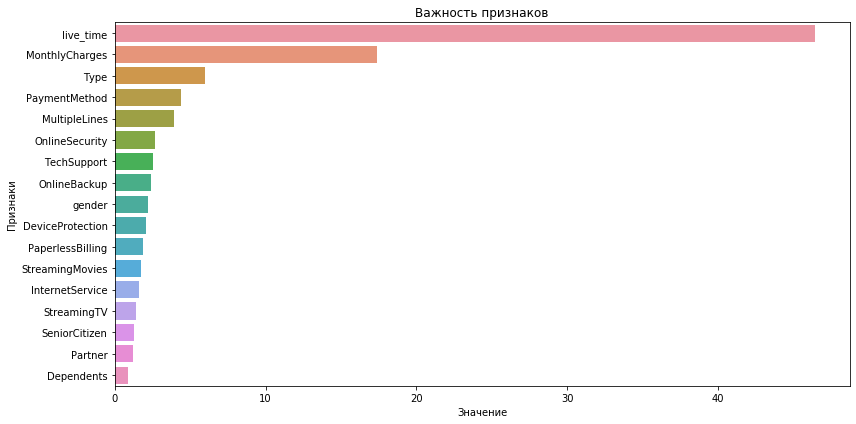

In [ ]:
feature_importance = cb_model.feature_importances_
feature_imp = pd.DataFrame(sorted(zip(feature_importance, X_col_train.columns)), columns=['Значение','Признаки'])
plt.figure(figsize=(12,6))
sns.barplot(x="Значение", y="Признаки", data=feature_imp.sort_values(by="Значение", ascending=False))
plt.title('Важность признаков')
plt.tight_layout()
plt.show();

Как видно, модели важны только первые 5 признаков, их и оставим для дальнейшей работы

In [ ]:
X_col_train = X_col_train[['live_time','MonthlyCharges','Type','PaymentMethod','MultipleLines']]

In [ ]:
X_col_valid = X_col_valid[['live_time','MonthlyCharges','Type','PaymentMethod','MultipleLines']]

In [ ]:
X_col_test = X_col_test[['live_time','MonthlyCharges','Type','PaymentMethod','MultipleLines']]

In [ ]:
cat_features = ['Type','PaymentMethod','MultipleLines']

Перед объединением тренировочной и валидационной выборок проверим не ухудшились ли показатели после проведенных манипуляций

In [ ]:
cb_model = CatBoostClassifier(loss_function='Logloss',random_state = 42,
                              cat_features=cat_features,early_stopping_rounds=200, verbose=100)

In [ ]:
grid = {'learning_rate': np.arange(0.05,1.05,0.2),
        'depth': [4, 6, 10]}

In [ ]:
grid_search_result = cb_model.grid_search(grid, X=X_col_train, y=y_col_train, cv=5)

0:	learn: 0.6595320	test: 0.6580734	best: 0.6580734 (0)	total: 10.7ms	remaining: 10.7s
100:	learn: 0.3788537	test: 0.3807850	best: 0.3807850 (100)	total: 1.28s	remaining: 11.4s
200:	learn: 0.3579156	test: 0.3652221	best: 0.3652221 (200)	total: 2.53s	remaining: 10.1s
300:	learn: 0.3357955	test: 0.3524584	best: 0.3524584 (300)	total: 3.77s	remaining: 8.76s
400:	learn: 0.3161509	test: 0.3425400	best: 0.3423147 (393)	total: 5.06s	remaining: 7.56s
500:	learn: 0.3009773	test: 0.3353121	best: 0.3353121 (500)	total: 6.36s	remaining: 6.33s
600:	learn: 0.2889136	test: 0.3315103	best: 0.3314107 (597)	total: 7.63s	remaining: 5.06s
700:	learn: 0.2769461	test: 0.3285983	best: 0.3285852 (699)	total: 8.94s	remaining: 3.81s
800:	learn: 0.2658513	test: 0.3235602	best: 0.3233735 (799)	total: 10.3s	remaining: 2.55s
900:	learn: 0.2572678	test: 0.3216222	best: 0.3210651 (885)	total: 11.6s	remaining: 1.28s
999:	learn: 0.2494722	test: 0.3187107	best: 0.3187107 (999)	total: 13s	remaining: 0us

bestTest = 0.318

In [ ]:
cb_model.get_params()

{'loss_function': 'Logloss',
 'verbose': 100,
 'random_state': 42,
 'early_stopping_rounds': 200,
 'cat_features': ['Type', 'PaymentMethod', 'MultipleLines'],
 'depth': 4,
 'learning_rate': 0.45}

In [ ]:
cb_pred = cb_model.predict_proba(X_col_valid)[:, 1]

In [ ]:
valid = roc_auc_score(y_col_valid, cb_pred)

In [ ]:
valid

0.9141291912347091

Показатель остался практически таким-же, но модель стала учиться немного быстрее, поэтому оставим такой вариант

Теперь объединим выборки, и перемешаем данные

In [ ]:
X_col_train = pd.concat([X_col_train, X_col_valid])

In [ ]:
y_col_train = pd.concat([y_col_train, y_col_valid])

In [ ]:
X_col_train, y_col_train = shuffle(X_col_train, y_col_train, random_state=42)

In [ ]:
print(X_col_train.shape, X_col_valid.shape)

(5625, 5) (1407, 5)


Обучим модель на объединенной выборке

In [ ]:
cb_model.fit(X_col_train,y_col_train)

0:	learn: 0.5013663	total: 11.7ms	remaining: 11.7s
100:	learn: 0.2538287	total: 1.47s	remaining: 13.1s
200:	learn: 0.2024816	total: 2.9s	remaining: 11.5s
300:	learn: 0.1768126	total: 4.34s	remaining: 10.1s
400:	learn: 0.1551994	total: 5.72s	remaining: 8.54s
500:	learn: 0.1406705	total: 7.22s	remaining: 7.19s
600:	learn: 0.1281306	total: 8.79s	remaining: 5.84s
700:	learn: 0.1176590	total: 10.3s	remaining: 4.39s
800:	learn: 0.1076511	total: 11.8s	remaining: 2.92s
900:	learn: 0.0995905	total: 13.2s	remaining: 1.45s
999:	learn: 0.0923475	total: 14.8s	remaining: 0us


## Тестирование модели, результаты

In [ ]:
cb_pred_test = cb_model.predict_proba(X_col_test)[:, 1]

In [ ]:
test = roc_auc_score(y_col_test, cb_pred_test)

In [ ]:
test

0.9265741234450305

Построим ROC-кривую

In [ ]:
fpr, tpr, tresholds = roc_curve(y_col_test, cb_model.predict_proba(X_col_test)[:, 1])

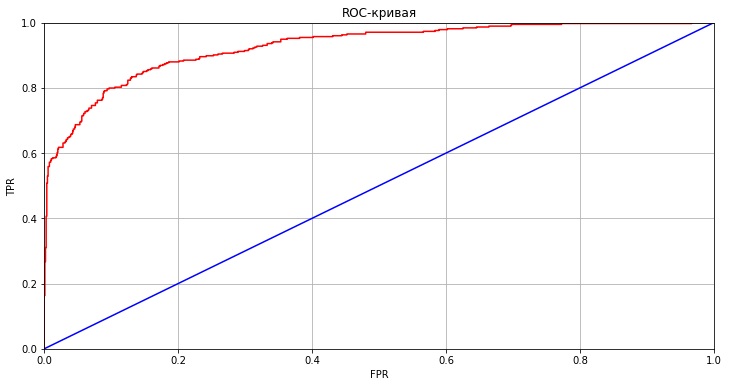

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(fpr, tpr, color='red', label='CatBoost')
plt.plot([0, 1], [0, 1], color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')
plt.grid(True)
plt.show()

Помимо требуемой метрики посмотрим еще precision, recall, f1-score, accuracy

In [ ]:
print(classification_report(y_col_test, cb_model.predict(X_col_test)))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1033
           1       0.82      0.69      0.75       374

    accuracy                           0.88      1407
   macro avg       0.86      0.82      0.84      1407
weighted avg       0.88      0.88      0.88      1407



## Вывод

Во время выполнения проекта было сделано:
- изучены и предобработаны данные, изменены типы признаком, добавлены новые колонки в том числе и с целевым признаком;
- исходные таблицы собраны в одну, количественные признаки были проверены на корреляцию;
- выбран первый вариант набора необходимых признаков, выборка поделена на 3 - тренировочную, валидационную и тестовую;
- количественные признаки отмасштабированы, также была попытка сбалансировать классы;
- обучена модель на первом варианте набора признаков, замерена метрика roc-auc;
- выбраны топ-5 важных признаков для катбуста, новая модель обучена только на них, также замерена метрика;
- тренировочная и валидационная выборки объединены, модель обучена на новой выборке;
- тестирование модели на тестовой выборке.

Выводы, которые можно сделать по результатам работы:
- наиболее значимым фактором, который определяет уйдет-ли клиент, является время в течение которого клиент пользуется услугами компании, чем оно больше - тем меньше вероятность того, что он уйдет меньше;
- балансировка классов только ухудшала необходимую метрику;
- построена модель, которая может пробить необходимый безлайн. За счет уменьшения передаваемых признаков, модель стала работать быстрее, чем первый ее вариант;
- из classification_report видно, что модель хорошо определяет тех, кто не собирается уходить. С уходящими модель справляется хуже - 18% клиентов, которых модель отметила, как уходящих, уходить не собираются, а также она не находит 31% уходящих клиентов;
- нам необходимы еще данные уходящих клиентов, тогда, возможно, показатели модели улучшатся;
- roc-auc не является достаточно информативной метрикой для данной задачи.